In [6]:
import pandas as pd, matplotlib.pyplot as plt, os
labels = pd.read_csv("../data/train_labels.csv")
labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


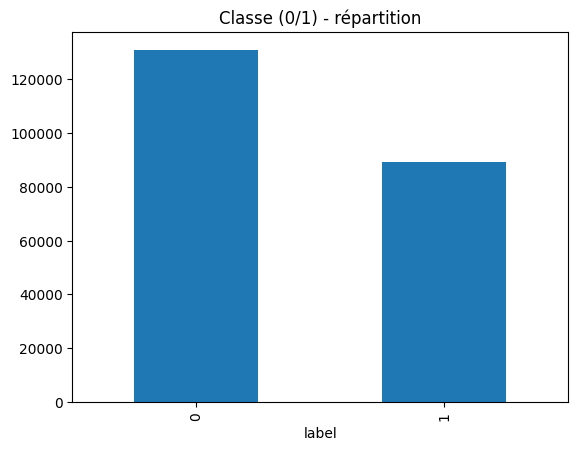

label
0    0.594969
1    0.405031
Name: proportion, dtype: float64


In [7]:
labels['label'].value_counts().plot(kind='bar')
plt.title("Classe (0/1) - répartition"); plt.show()
print(labels['label'].value_counts(normalize=True))

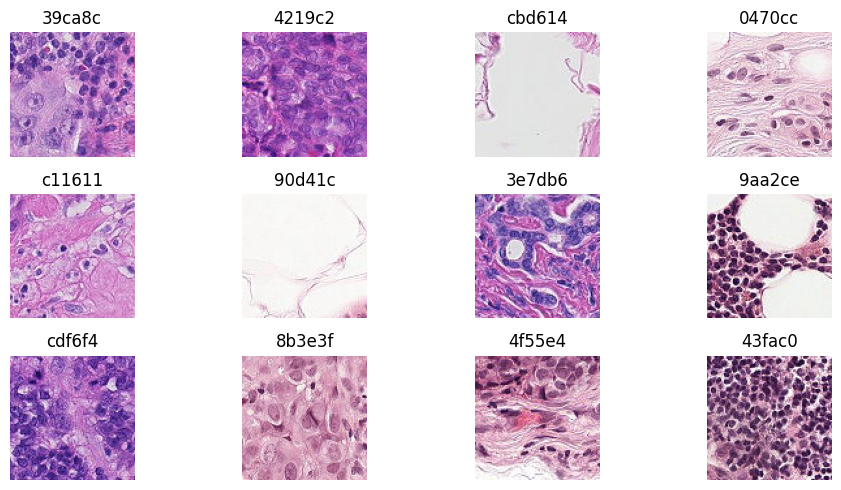

In [12]:
from PIL import Image
import random
ids = labels.sample(12, random_state=0)['id'].tolist()
fig, axs = plt.subplots(3,4, figsize=(10,5))
for ax, _id in zip(axs.ravel(), ids):
    for ext in [".png",".jpg",".jpeg",".tif"]:
        p = f"../data/train/{_id}{ext}"
        if os.path.exists(p):
            ax.imshow(Image.open(p)); ax.set_title(_id[:6]); ax.axis('off'); break
plt.tight_layout(); plt.show()